# ASTR19 Group Project - Tides

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, interpolate
%matplotlib inline

In [12]:
# get data
days, time, height = np.loadtxt('ASTR19_F23_group_project_data.txt', skiprows=3, unpack=True, usecols=(0, 1, 2), dtype=str)

# each element is a list [day, hour, minutes]
days_hours_and_minutes = [[days[i]] + time[i].split(':') for i in range(len(time))]

print(days_hours_and_minutes)

[['1', '8', '07'], ['1', '15', '37'], ['2', '8', '55'], ['2', '16', '25'], ['3', '9', '45'], ['3', '17', '14'], ['4', '10', '35'], ['4', '18', '00'], ['5', '11', '28'], ['5', '18', '46'], ['6', '12', '22'], ['6', '19', '31'], ['7', '13', '24'], ['7', '20', '16'], ['8', '3', '22'], ['8', '21', '01'], ['9', '4', '07'], ['9', '21', '46'], ['10', '4', '50'], ['10', '11', '58'], ['11', '5', '31'], ['11', '12', '56'], ['12', '6', '08'], ['12', '13', '45'], ['13', '6', '47'], ['13', '14', '25'], ['14', '7', '22'], ['14', '15', '00'], ['15', '7', '59'], ['15', '15', '34'], ['16', '8', '34'], ['16', '16', '08'], ['17', '9', '10'], ['17', '16', '41'], ['18', '9', '45'], ['18', '17', '12'], ['19', '10', '21'], ['19', '17', '45'], ['20', '10', '57'], ['20', '18', '15'], ['21', '11', '38'], ['21', '18', '48'], ['22', '12', '25'], ['22', '19', '20'], ['23', '2', '22'], ['23', '19', '52'], ['24', '2', '58'], ['24', '20', '30'], ['25', '3', '37'], ['25', '10', '44'], ['26', '4', '23'], ['26', '11', '5

In [13]:
# convert data points to hours
def convert_to_hours(days_hours_and_minutes):
    hours = []
    for day, hour, mins in days_hours_and_minutes:
        hour = int(hour) + int(mins) / 60
        hour += (int(day) - 1) * 24
        hours.append(hour)
    return np.array(hours)

In [14]:
# values for our x-axis
x = convert_to_hours(days_hours_and_minutes)
print(type(x), "hours:")
print(x)

# convert height to float
print(type(height), "height:")
y = height.astype(np.float64)
print(y)


<class 'numpy.ndarray'> hours:
[  8.11666667  15.61666667  32.91666667  40.41666667  57.75
  65.23333333  82.58333333  90.         107.46666667 114.76666667
 132.36666667 139.51666667 157.4        164.26666667 171.36666667
 189.01666667 196.11666667 213.76666667 220.83333333 227.96666667
 245.51666667 252.93333333 270.13333333 277.75       294.78333333
 302.41666667 319.36666667 327.         343.98333333 351.56666667
 368.56666667 376.13333333 393.16666667 400.68333333 417.75
 425.2        442.35       449.75       466.95       474.25
 491.63333333 498.8        516.41666667 523.33333333 530.36666667
 547.86666667 554.96666667 572.5        579.61666667 586.73333333
 604.38333333 611.91666667 629.25       636.95       654.15
 661.83333333 679.08333333 686.65       703.96666667 711.45
 728.83333333 736.16666667 753.66666667 760.86666667 778.5
 785.56666667 803.31666667 810.2        828.16666667 834.81666667
 841.53333333 859.4        866.21666667 884.         890.9
 897.9        915.65   

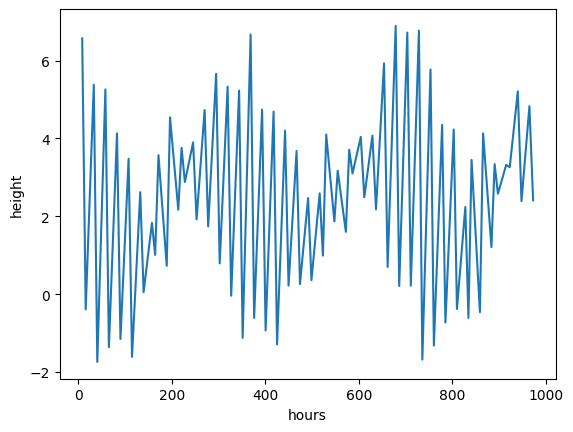

In [15]:
# plot x vs. y
plt.plot(x, y)
plt.xlabel('hours')
plt.ylabel('height')
plt.show()

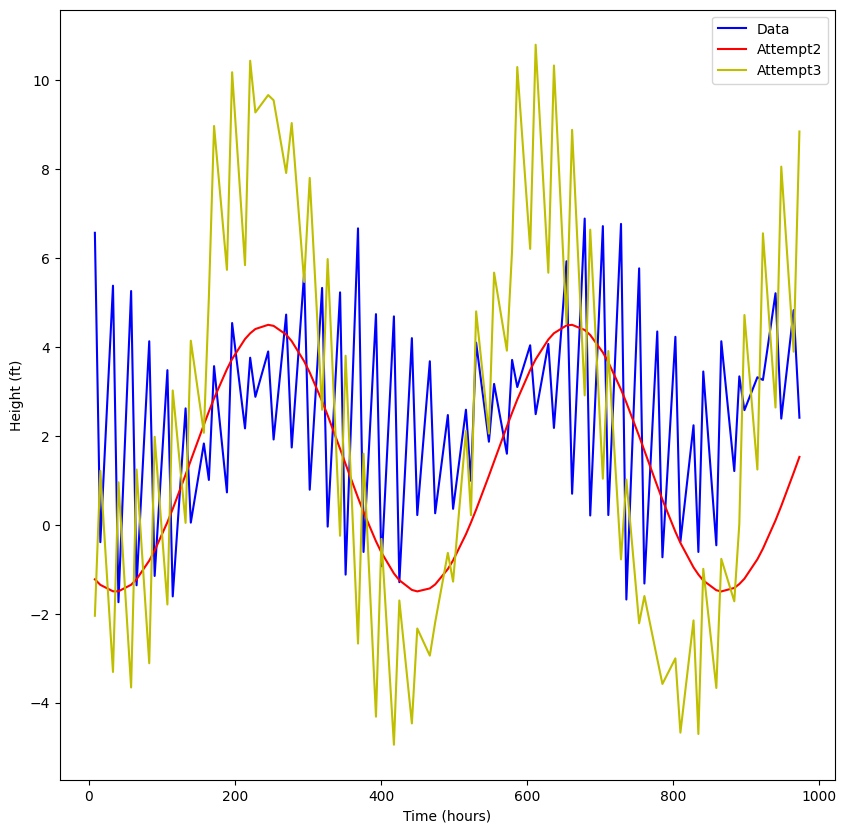

In [16]:
# first attempt
def sin(x, a, b):
    frequency = (2 * np.pi) / 25
    return a * (np.sin(x * frequency + b)) + 1.5

# second attempt for smoother curve
def sin2(x, a, b):
    frequency = (2 * np.pi) / (26 * 16)
    return a * (np.sin(x * frequency + b)) + 1.5

# add both together for third attempt
def sin3(x, a1, b1, a2, b2):
    frequency1 = (2 * np.pi) / 26
    frequency2 = (2 * np.pi) / (26 * 15)
    return (a1 * (np.sin(x * frequency1 + b1)) + 1.5) + (a2 * (np.sin(x * frequency2 + b2)) + 1.5)

# try a wavelength
attempt = sin(x, 3, 400)
attempt2 = sin2(x, 3, 400)
attempt3 = sin3(x, 3, 400, 5, 400)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(x, y, 'b-', label='Data')
ax.plot(x, attempt2, 'r-', label='Attempt2')
ax.plot(x, attempt3, 'y-', label='Attempt3')

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Height (ft)')
ax.legend()

plt.show()

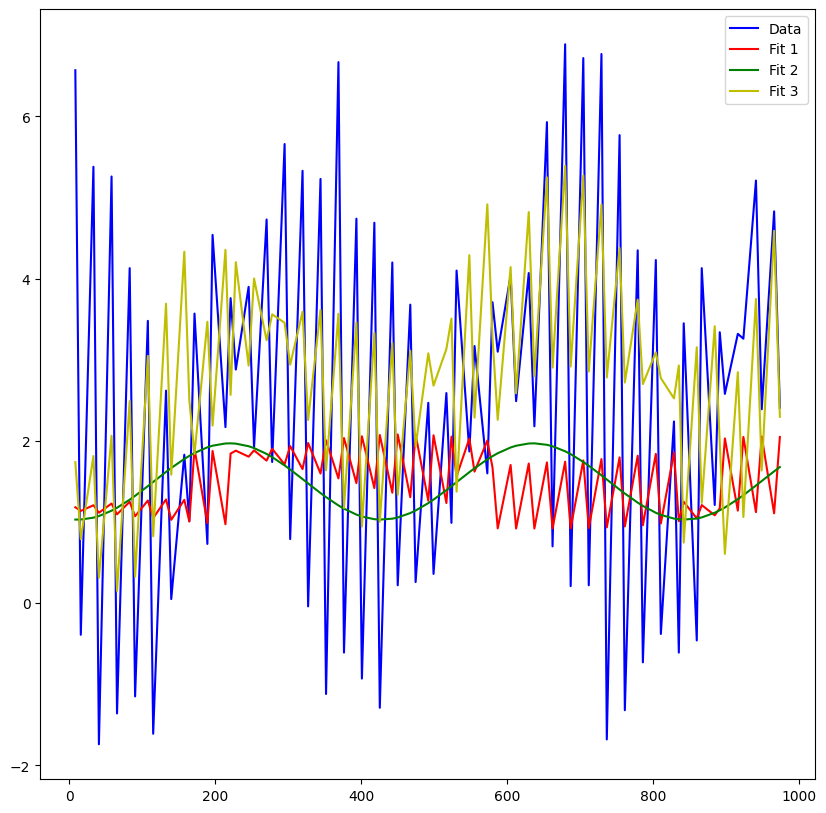

In [19]:
# get the fit for first attempt
params_1, params_cov_1 = optimize.curve_fit(sin, x, y, sigma=0.25)
a_fit_1, b_fit_1 = params_1
y_fit_1 = sin(x, a_fit_1, b_fit_1)

# get fit for second attempt
params_2, params_cov_2 = optimize.curve_fit(sin2, x, y, sigma=0.25)
a_fit_2, b_fit_2 = params_2
y_fit_2 = sin2(x, a_fit_2, b_fit_2)

# get fit for third attempt
params_3, params_cov_3 = optimize.curve_fit(sin3, x, y, sigma=0.25)
a1_fit, b1_fit, a2_fit, b2_fit = params_3
y_fit_3 = sin3(x, a1_fit, b1_fit, a2_fit, b2_fit)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(x, y, 'b-', label='Data')
ax.plot(x, y_fit_1, 'r-', label='Fit 1')
ax.plot(x, y_fit_2, 'g-', label='Fit 2')
ax.plot(x, y_fit_3, 'y-', label='Fit 3')
ax.legend()

plt.show()
